### About the dataset

#### how does HR Analytics help in analyzing attrition?we will write the code and try to understand the process step by step.

### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
df = pd.read_csv("HR.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### I am supposed predict Attrition, so its clearly a classification problem

In [4]:
df.shape

(1470, 35)

#### checking for null values

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### No null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### converting categorical columns to numerical

In [8]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for column in df:
    df[column] = label_enc.fit_transform(df[column])
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2


### EDA

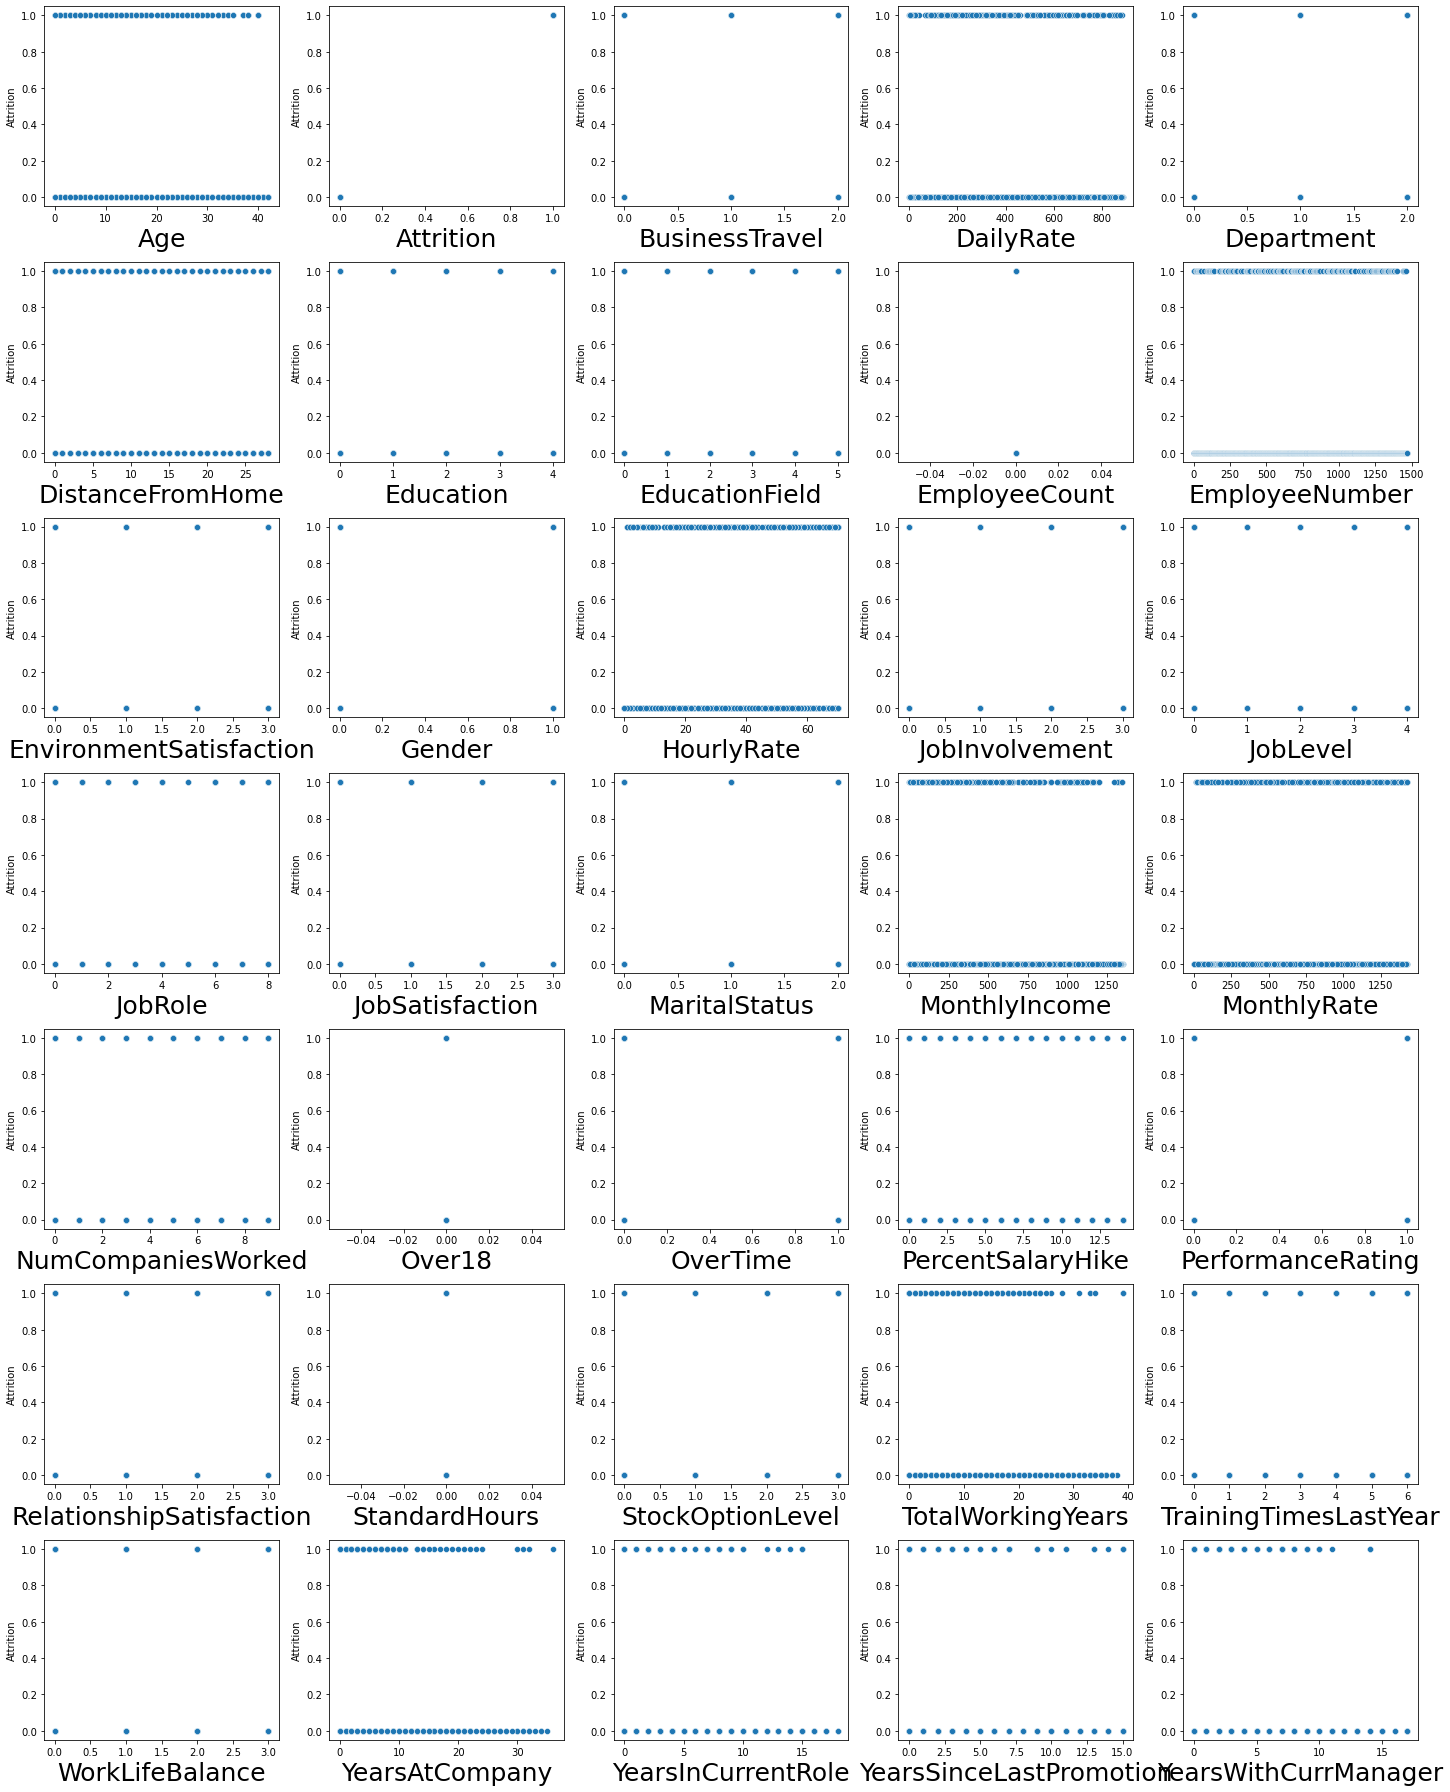

In [13]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.scatterplot(x=df[column],y=df['Attrition'],data=df)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

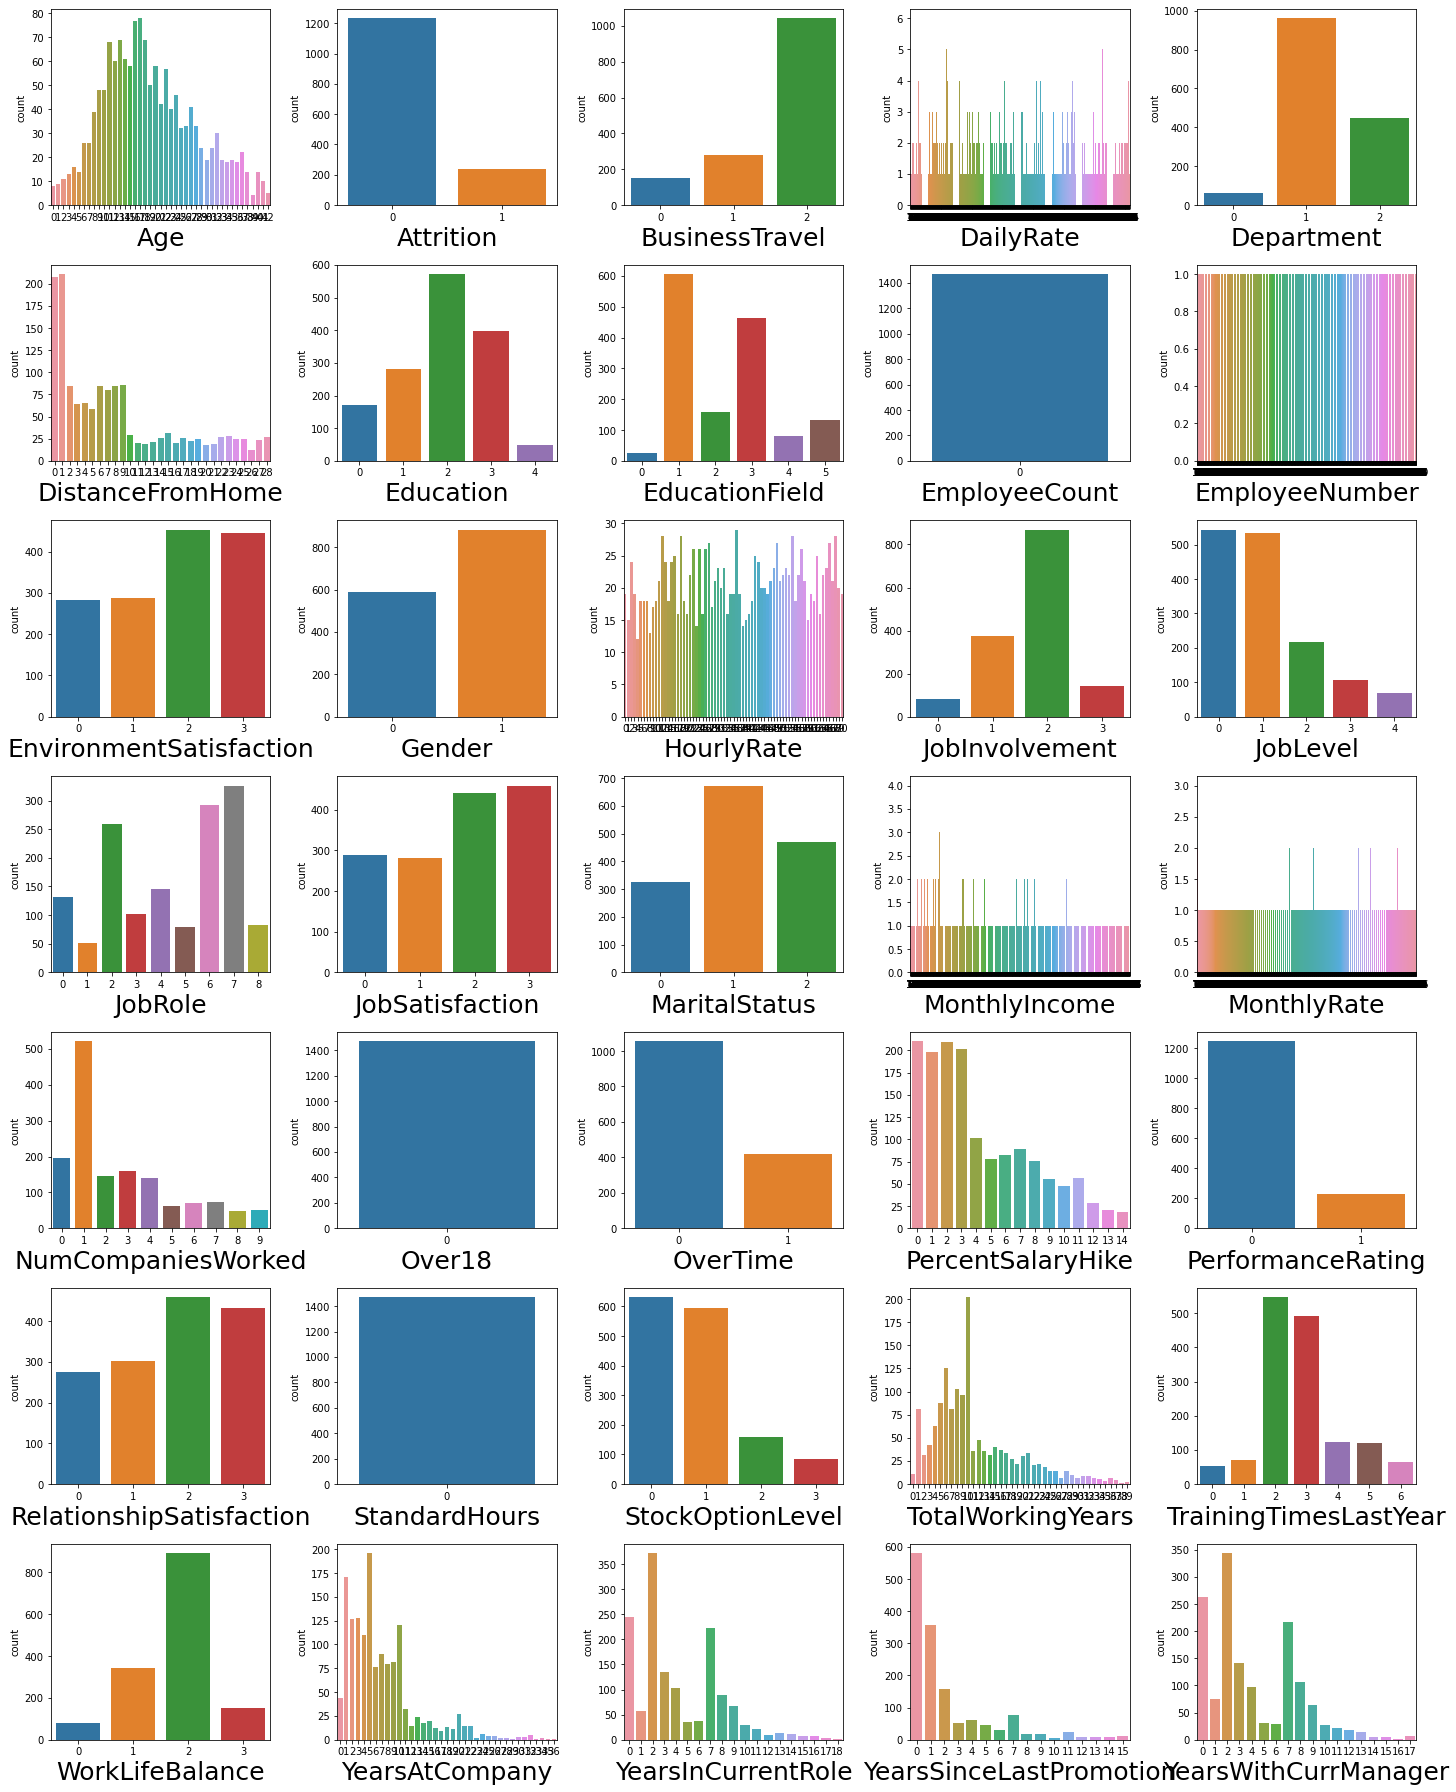

In [15]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Checking the correlation

In [16]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010557,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010349,...,0.053535,NaN,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010369,...,-0.045872,NaN,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015810,...,-0.035986,NaN,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
DailyRate,0.010557,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,NaN,-0.051861,...,0.008530,NaN,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849
Department,-0.031882,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,NaN,-0.010365,...,-0.022414,NaN,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,NaN,0.032928,...,0.006557,NaN,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,NaN,0.041901,...,-0.009118,NaN,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002457,...,-0.004378,NaN,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010349,-0.010369,-0.015810,-0.051861,-0.010365,0.032928,0.041901,-0.002457,NaN,1.000000,...,-0.069654,NaN,0.062452,-0.013950,0.023907,0.010740,-0.010528,-0.008853,-0.009151,-0.009432


#### BusinessTravel ,HourlyRate and PerformanceRating is having the least correlation with target variable,

#### Statistical Analysis

In [17]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,18.923810,0.161224,1.607483,443.074830,1.260544,8.192517,1.912925,2.247619,0.0,734.500000,...,1.712245,0.0,0.793878,11.278231,2.799320,1.761224,6.991156,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,253.513199,0.527792,8.106864,1.024165,1.331369,0.0,424.496761,...,1.081209,0.0,0.852077,7.775842,1.289271,0.706476,6.053027,3.623137,3.222430,3.568136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,1.000000,225.000000,1.000000,1.000000,1.000000,1.000000,0.0,367.250000,...,1.000000,0.0,0.000000,6.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000
50%,18.000000,0.000000,2.000000,447.000000,1.000000,6.000000,2.000000,2.000000,0.0,734.500000,...,2.000000,0.0,1.000000,10.000000,3.000000,2.000000,5.000000,3.000000,1.000000,3.000000
75%,25.000000,0.000000,2.000000,660.000000,2.000000,13.000000,3.000000,3.000000,0.0,1101.750000,...,3.000000,0.0,1.000000,15.000000,3.000000,2.000000,9.000000,7.000000,3.000000,7.000000
max,42.000000,1.000000,2.000000,885.000000,2.000000,28.000000,4.000000,5.000000,0.0,1469.000000,...,3.000000,0.0,3.000000,39.000000,6.000000,3.000000,36.000000,18.000000,15.000000,17.000000


#### YearsInCurrentRole and YearsWithCurrManager is correlated

#### Checking for outliers

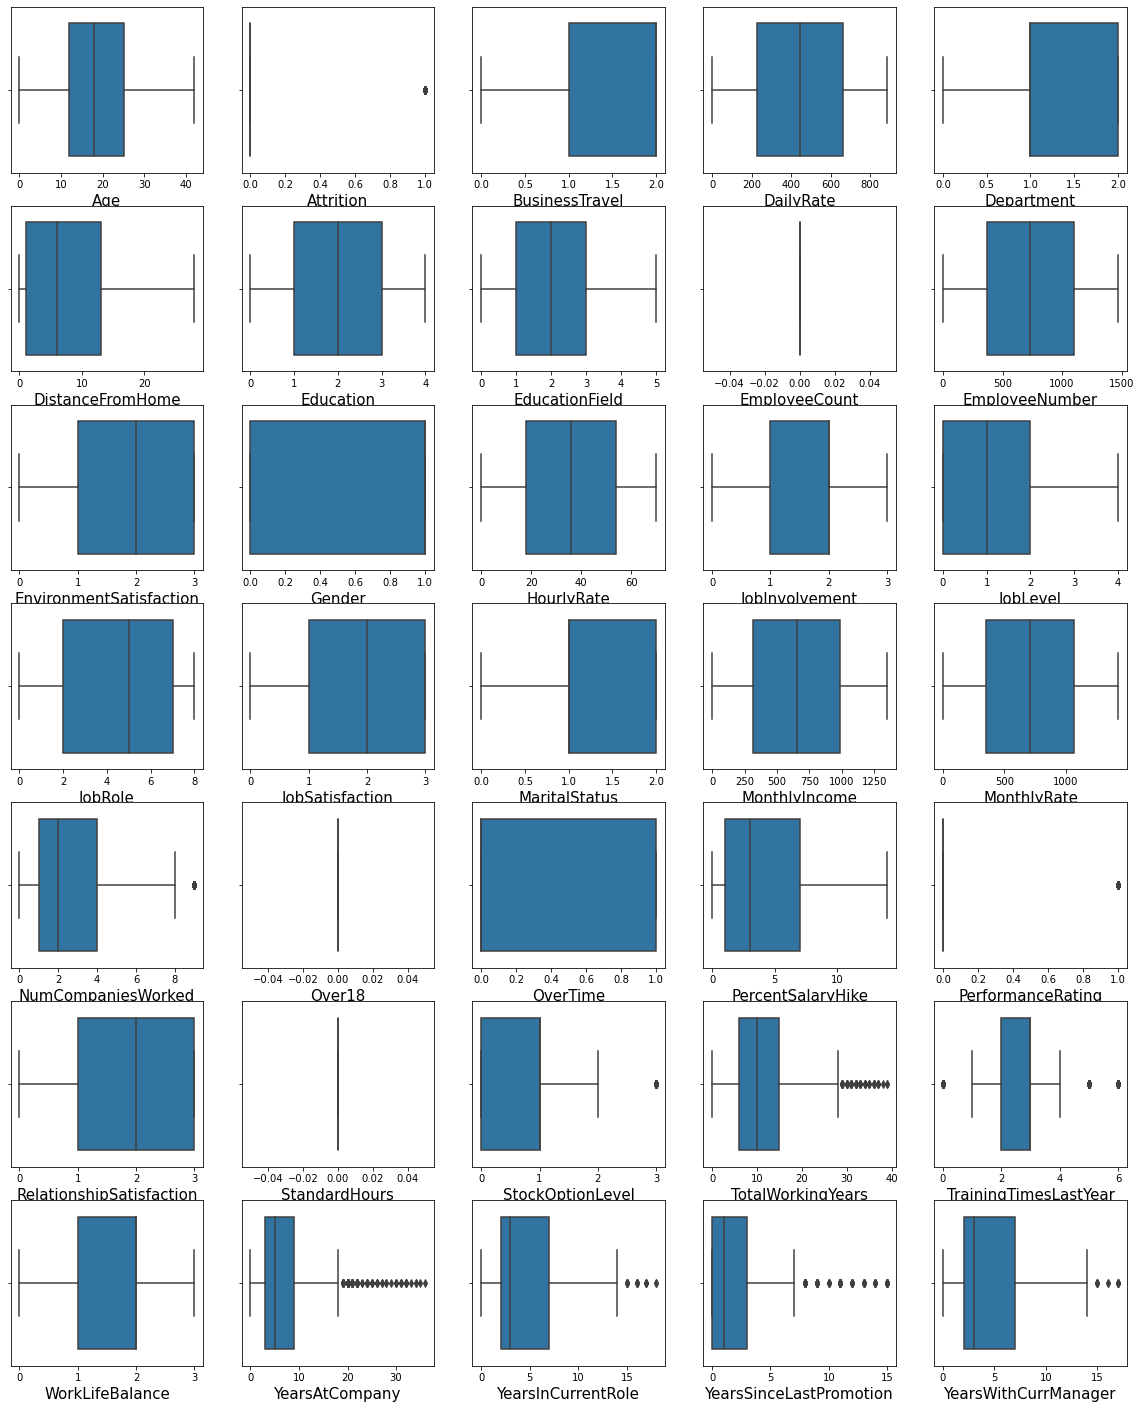

In [18]:
plt.figure(figsize=(20,25))
gr = 1
for column in df:
    if gr<=35:
        ax = plt.subplot(7,5,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Outliers do exist in the dataset

#### Checking skewness

In [19]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

#### Visualizing the distribution

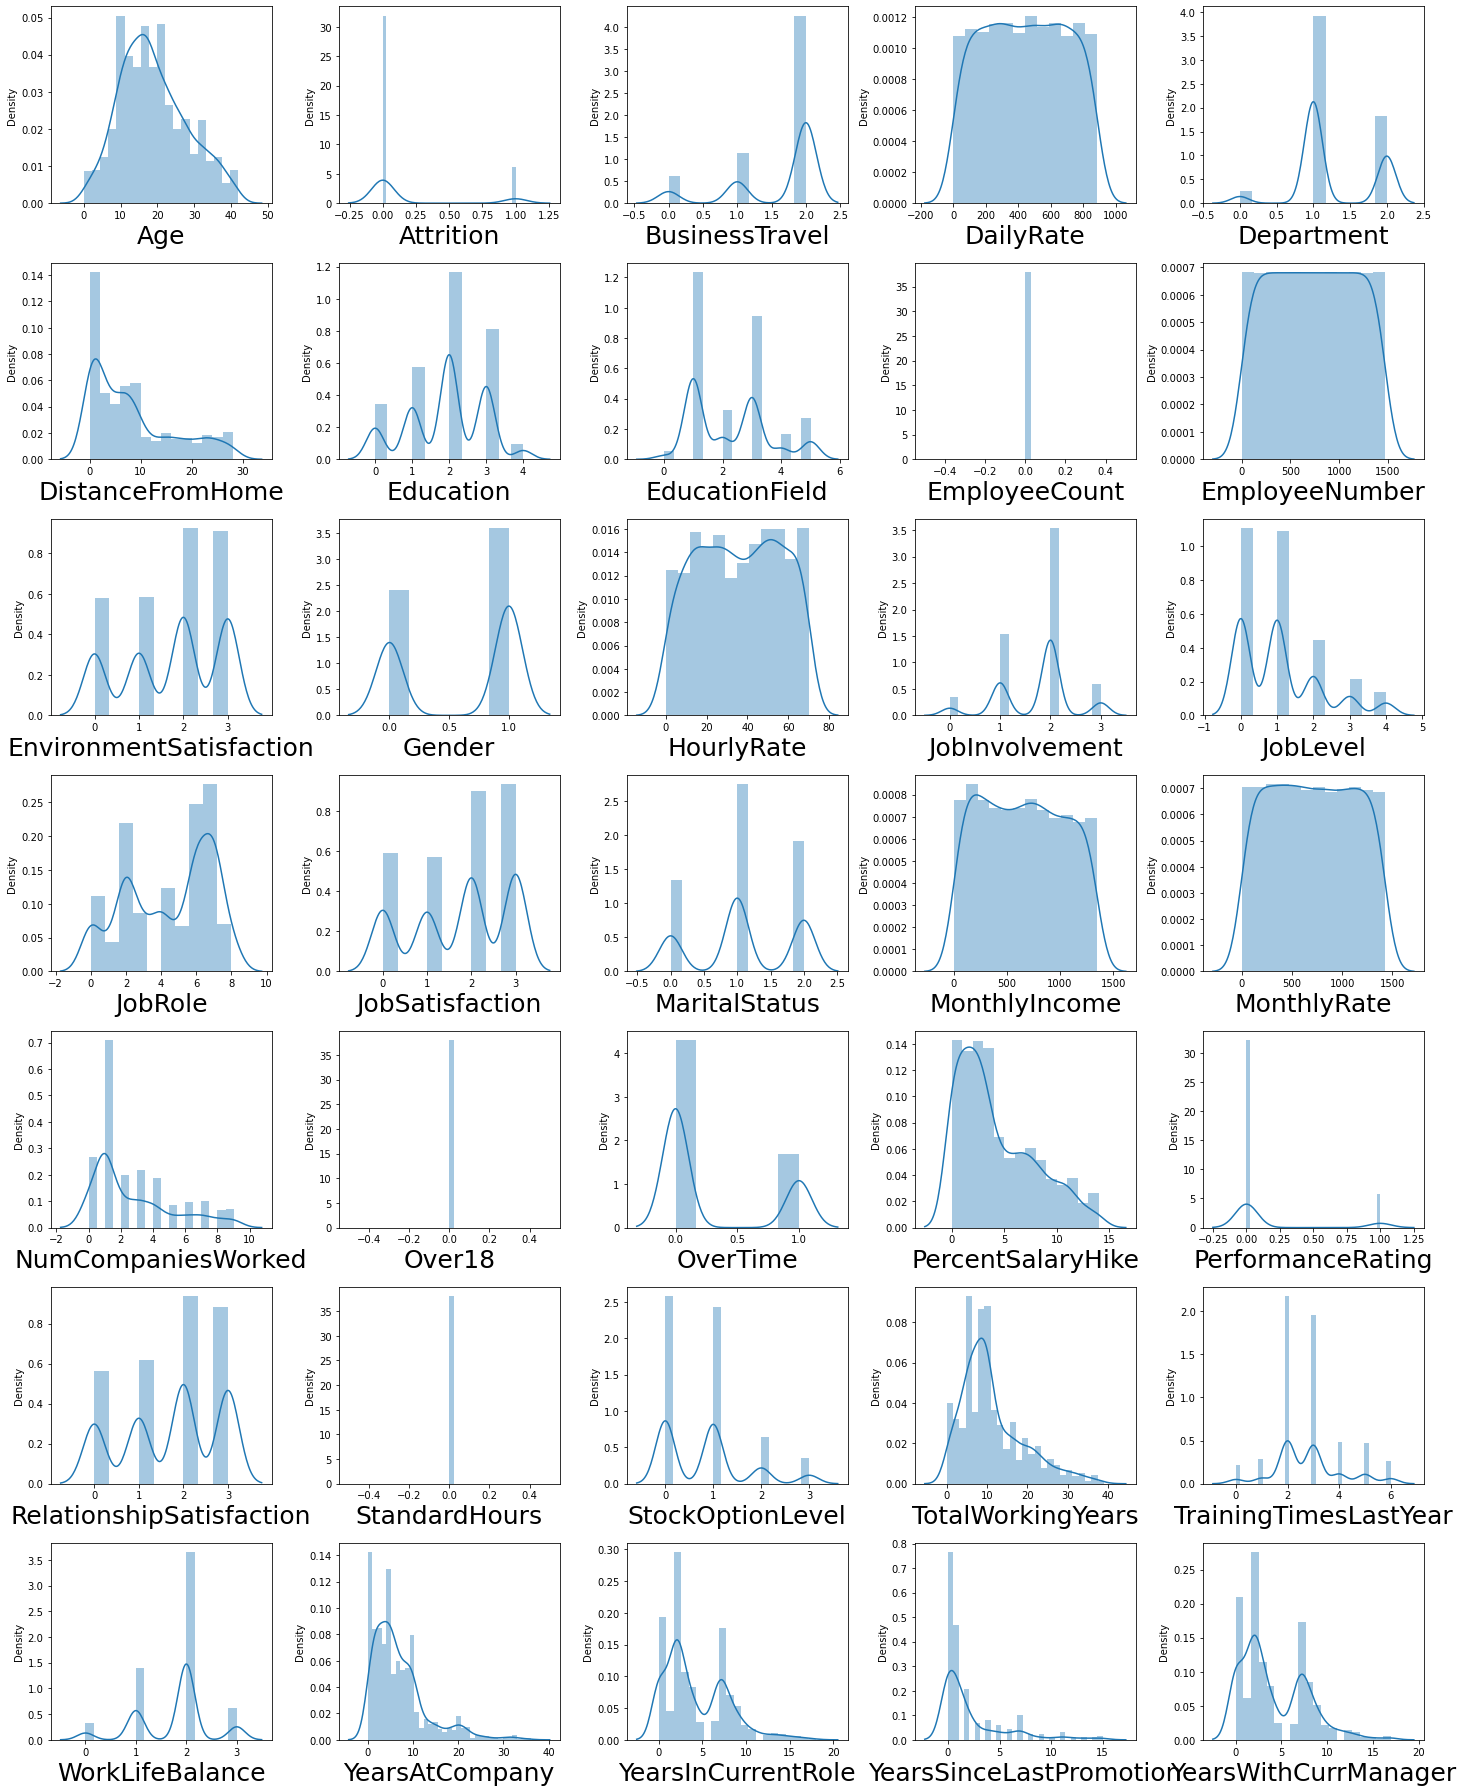

In [20]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Attrition is skewed, which implies that the target column in imbalanced

#### Data Cleaning
##### Dropping BusinessTravel,PerformanceRating,HourlyRate and YearsWithCurrManager as they don't have any significant role in attrition prediction

In [21]:
df = df.drop(columns=['BusinessTravel','PerformanceRating','HourlyRate','YearsWithCurrManager'],axis=1)
df.head(2)

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,23,1,624,2,0,1,1,0,0,1,...,0,0,0,0,8,0,0,6,4,0
1,31,0,113,1,7,0,1,0,1,2,...,12,3,0,1,10,3,2,10,7,1


#### Visualizing the data imbalance

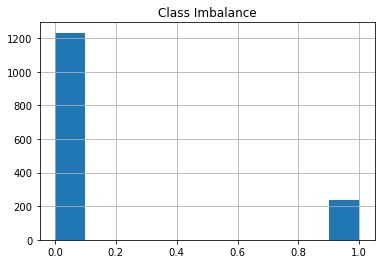

In [22]:
df['Attrition'].hist(grid=True)
plt.title("Class Imbalance")
plt.show()

#### Removing Outliers by zscore method

In [23]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print("Old shape : ",z.shape)
print(z)
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
df1 = df.drop(df.index[index])
print("New shape : ",df1.shape)

Old shape :  (1470, 31)
[[0.4463504  2.28090588 0.71391447 ... 0.16380132 0.0632959  0.67914568]
 [1.32236521 0.4384223  1.30244563 ... 0.49724999 0.76499762 0.36871529]
 [0.008343   2.28090588 1.42812421 ... 1.15537829 1.16768726 0.67914568]
 ...
 [1.08667552 0.4384223  1.59444298 ... 0.16380132 0.61549158 0.67914568]
 [1.32236521 0.4384223  0.53634851 ... 0.33198716 0.48889978 0.67914568]
 [0.32016256 0.4384223  0.42250766 ... 0.49432698 0.33939374 0.36871529]]
Row numbers :  [  45   62   62   63   64   85   98   98  110  123  123  126  126  126
  178  187  190  190  218  231  237  237  270  270  281  326  386  401
  411  425  425  427  445  466  473  477  535  561  584  592  595  595
  595  624  653  653  677  701  716  746  749  752  799  838  861  861
  875  894  914  914  918  922  926  937  956  962  976  976 1008 1024
 1043 1078 1086 1086 1093 1111 1116 1116 1135 1138 1138 1156 1184 1221
 1223 1242 1295 1301 1301 1303 1327 1331 1351 1401 1414 1430]
Column numbers :  [  45   62 

#### Data loss in percentage

In [24]:
loss = (1470-1393)/1470*100
print("While removing outliers we loss ",loss,"% of data")

While removing outliers we loss  5.238095238095238 % of data


#### Splitting the dataset into Target variable(y) and feature variables(x)

In [26]:
x = df1.drop('Attrition',axis=1)
y = df1["Attrition"]

#### Removing skewness

In [27]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[ 0.59144169,  0.72759652,  1.38160296, ...,  0.22358501,
         0.28384181, -1.07504388],
       [ 1.36452982, -1.34585742, -0.47289392, ...,  0.93385582,
         0.99845446,  0.18703872],
       [ 0.16893541,  1.32025988, -0.47289392, ..., -2.1582498 ,
        -1.57356013, -1.07504388],
       ...,
       [-1.06088039, -1.79870181, -0.47289392, ...,  0.22358501,
        -0.39586592, -1.07504388],
       [ 1.36452982,  0.57326572,  1.38160296, ...,  0.77830978,
         0.78604765, -1.07504388],
       [-0.16906448, -0.32867475, -0.47289392, ..., -0.26228299,
        -0.02472896,  0.18703872]])

In [28]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

Age                        -0.017723
DailyRate                  -0.283840
Department                  0.015629
DistanceFromHome           -0.061230
Education                  -0.151069
EducationField             -0.008338
EmployeeCount               0.000000
EmployeeNumber             -0.288940
EnvironmentSatisfaction    -0.262846
Gender                     -0.415419
JobInvolvement             -0.044341
JobLevel                    0.066536
JobRole                    -0.334520
JobSatisfaction            -0.275303
MaritalStatus              -0.157814
MonthlyIncome              -0.253878
MonthlyRate                -0.273777
NumCompaniesWorked          0.015994
Over18                      0.000000
OverTime                    0.953608
PercentSalaryHike          -0.053164
RelationshipSatisfaction   -0.248251
StandardHours               0.000000
StockOptionLevel            0.088202
TotalWorkingYears          -0.010864
TrainingTimesLastYear       0.058390
WorkLifeBalance            -0.037951
Y

#### Since the data is imbalanced, lets make it balanced by oversampling

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [30]:
y_over.value_counts()

1    1164
0    1164
Name: Attrition, dtype: int64

#### Scaling the data

In [31]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_over)

#### Finding the best random state

In [32]:
from sklearn.linear_model import LogisticRegression
max_accuracy = 0
max_rs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_over,test_size=0.25,random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score>max_accuracy:
        max_accuracy = accu_score
        max_rs = i
print("Maximum accuracy is",max_accuracy,"when",max_rs,"is the random state")

Maximum accuracy is 0.8556701030927835 when 180 is the random state


#### Splitting the dataset into train and test

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_over,test_size=0.25,random_state = 180)

### Model Training

#### i) Logistic Regression

In [35]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,y_pred_lr)
print("Accuracy of Logistic Regression model is ",lr_accuracy)
print("Confusion Matrix","\n",confusion_matrix(y_test,y_pred_lr))
classification_rep = classification_report(y_test,y_pred_lr)
print("Classification report ; \n",classification_rep)

Accuracy of Logistic Regression model is  0.8556701030927835
Confusion Matrix 
 [[250  34]
 [ 50 248]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       284
           1       0.88      0.83      0.86       298

    accuracy                           0.86       582
   macro avg       0.86      0.86      0.86       582
weighted avg       0.86      0.86      0.86       582



#### Logistic Regression works with an accuracy of 85.57%

##### ii)DecisionTree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,y_pred_dt)
conf_mat = confusion_matrix(y_test,y_pred_dt)
classification_rep = classification_report(y_test,y_pred_dt)
print("Accuracy of Decision Tree classifier model is ",dt_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Decision Tree classifier model is  0.7938144329896907
Confusion Matrix 
 [[216  68]
 [ 52 246]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       284
           1       0.78      0.83      0.80       298

    accuracy                           0.79       582
   macro avg       0.79      0.79      0.79       582
weighted avg       0.79      0.79      0.79       582



#### Decision Tree works with an accuracy of 79.38%

#### iii)Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
conf_mat = confusion_matrix(y_test,y_pred_rf)
classification_rep = classification_report(y_test,y_pred_rf)
print("Accuracy of Random forest classifier model is ",rf_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Random forest classifier model is  0.936426116838488
Confusion Matrix 
 [[269  15]
 [ 22 276]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       284
           1       0.95      0.93      0.94       298

    accuracy                           0.94       582
   macro avg       0.94      0.94      0.94       582
weighted avg       0.94      0.94      0.94       582



#### Random Forest classifier works with an accuracy of 93.64%

#### iv) SVC

In [38]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test,y_pred_svc)
conf_mat = confusion_matrix(y_test,y_pred_svc)
classification_rep = classification_report(y_test,y_pred_svc)
print("Accuracy of SVC model is ",svc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of SVC model is  0.9381443298969072
Confusion Matrix 
 [[265  19]
 [ 17 281]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       284
           1       0.94      0.94      0.94       298

    accuracy                           0.94       582
   macro avg       0.94      0.94      0.94       582
weighted avg       0.94      0.94      0.94       582



#### SVC works with an accuracy of 93.81%

In [39]:
#### v)import xgboost as xgb
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)
conf_mat = confusion_matrix(y_test,y_pred_xgbc)
classification_rep = classification_report(y_test,y_pred_xgbc)
print("Accuracy of Xgboost model is ",xgbc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

[19:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Xgboost model is  0.9398625429553265
Confusion Matrix 
 [[271  13]
 [ 22 276]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       284
           1       0.96      0.93      0.94       298

    accuracy                           0.94       582
   macro avg       0.94      0.94      0.94       582
weighted avg       0.94      0.94      0.94       582



#### XGBoost works with an accuracy of 93.99%

#### Cross Validating

In [40]:
cvs = cross_val_score(lr,X_scaled,y_over,cv=5)
print("Cross validation score of Logistic Regression model is : ",cvs.mean())

Cross validation score of Logistic Regression model is :  0.7903964188472011


In [41]:
cvs = cross_val_score(dt,X_scaled,y_over,cv=5)
print("Cross validation score of DecisionTreeClassifier is : ",cvs.mean())

Cross validation score of DecisionTreeClassifier is :  0.6704693340717154


In [42]:
cvs = cross_val_score(rf,X_scaled,y_over,cv=5)
print("Cross validation score of RandomForestClassifier is : ",cvs.mean())

Cross validation score of RandomForestClassifier is :  0.7774451982094237


In [43]:
cvs = cross_val_score(svc,X_scaled,y_over,cv=5)
print("Cross validation score of SVC is : ",cvs.mean())

Cross validation score of SVC is :  0.8582897226452536


In [44]:
cvs = cross_val_score(xgbc,X_scaled,y_over,cv=5)
print("Cross validation score of XGBoostClassifier is : ",cvs.mean())

[19:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### Finding the best fit model

In [45]:
model = pd.DataFrame([["Logistic Regression","85.57","79.04","6.53"],["DecisionTreeClassifier","79.38","67.05","12.33"],["RandomForestClassifier","93.64","77.75","15.89"],["SVC","93.81","85.83","7.98"],["XGBoostClassifier","93.99","62.97","31.02"]],columns=["Model","Accuracy","Cross Validation Score","Difference"])
model

,Model,Accuracy,Cross Validation Score,Difference
0,Logistic Regression,85.57,79.04,6.53
1,DecisionTreeClassifier,79.38,67.05,12.33
2,RandomForestClassifier,93.64,77.75,15.89
3,SVC,93.81,85.83,7.98
4,XGBoostClassifier,93.99,62.97,31.02


#### Logistic Regression turns out to be the best model

### Hyperparameter tuning

In [52]:
params = {'C':np.arange(0.001,1.5),           # C is the inverse of regularization strength
         'penalty':['l1','l2'],
         'max_iter':np.arange(10,199)
         }
grd = GridSearchCV(lr,params,cv=5)
grd.fit(x_train,y_train)
grd.best_params_

{'C': 1.001, 'max_iter': 10, 'penalty': 'l2'}

In [53]:
model = LogisticRegression(C=1.001,max_iter=10,penalty='l2')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score after hyperparameter tuning is ",accuracy_score(y_test,y_pred))

Accuracy Score after hyperparameter tuning is  0.8556701030927835


#### Plotting ROC-AUC Curve

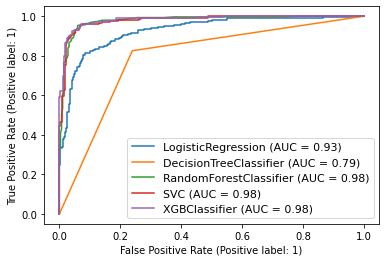

In [54]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgbc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### Saving the model

In [55]:
filename = 'HR_Attrition.pkl'
pickle.dump(lr,open(filename,'wb'))